In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [23]:
data =pd.read_csv('bbc.csv')

In [24]:
news = data.text.tolist()

In [25]:
import lda 
from sklearn.feature_extraction.text import CountVectorizer 
n_topics = 5 # number of topics 
n_iter = 500 # number of iterations 

# vectorizer: ignore English stopwords & words that occur less than 5 times 
cvectorizer = CountVectorizer(min_df =5, stop_words ='english') 
cvz = cvectorizer.fit_transform(news) 

# train an LDA model 
lda_model = lda.LDA(n_topics =n_topics, n_iter =n_iter) 
X_topics = lda_model.fit_transform(cvz) 

INFO:lda:n_documents: 2225
INFO:lda:vocab_size: 9106
INFO:lda:n_words: 389205
INFO:lda:n_topics: 5
INFO:lda:n_iter: 500
D:\Anaconda\lib\site-packages\lda\utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -4011220
INFO:lda:<10> log likelihood: -3424598
INFO:lda:<20> log likelihood: -3301499
INFO:lda:<30> log likelihood: -3267551
INFO:lda:<40> log likelihood: -3248454
INFO:lda:<50> log likelihood: -3237304
INFO:lda:<60> log likelihood: -3225927
INFO:lda:<70> log likelihood: -3218371
INFO:lda:<80> log likelihood: -3212566
INFO:lda:<90> log likelihood: -3207841
INFO:lda:<100> log likelihood: -3204572
INFO:lda:<110> log likelihood: -3201774
INFO:lda:<120> log likelihood: -3199989
INFO:lda:<130> log likelihood: -3198102
INFO:lda:<140> log likelihood: -3196904
INFO:lda:<

In [34]:
n_top_words = 5 # number of keywords we extract
lda_keys = [] 
for i in range(X_topics.shape[0]): 
    lda_keys.append( X_topics[i].argmax())
    
topic_summaries = [] 
topic_word = lda_model.topic_word_ # all topic words 
vocab = cvectorizer.get_feature_names() 

for i, topic_dist in enumerate(topic_word): 
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1] 
    topic_summaries.append(' ' .join(topic_words)) 

In [9]:
len(topic_summaries)

5

In [10]:
topic_summaries

['said game win england world',
 'said people technology mobile new',
 'said bn year market growth',
 'film best said years music',
 'said mr people government labour']

In [22]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

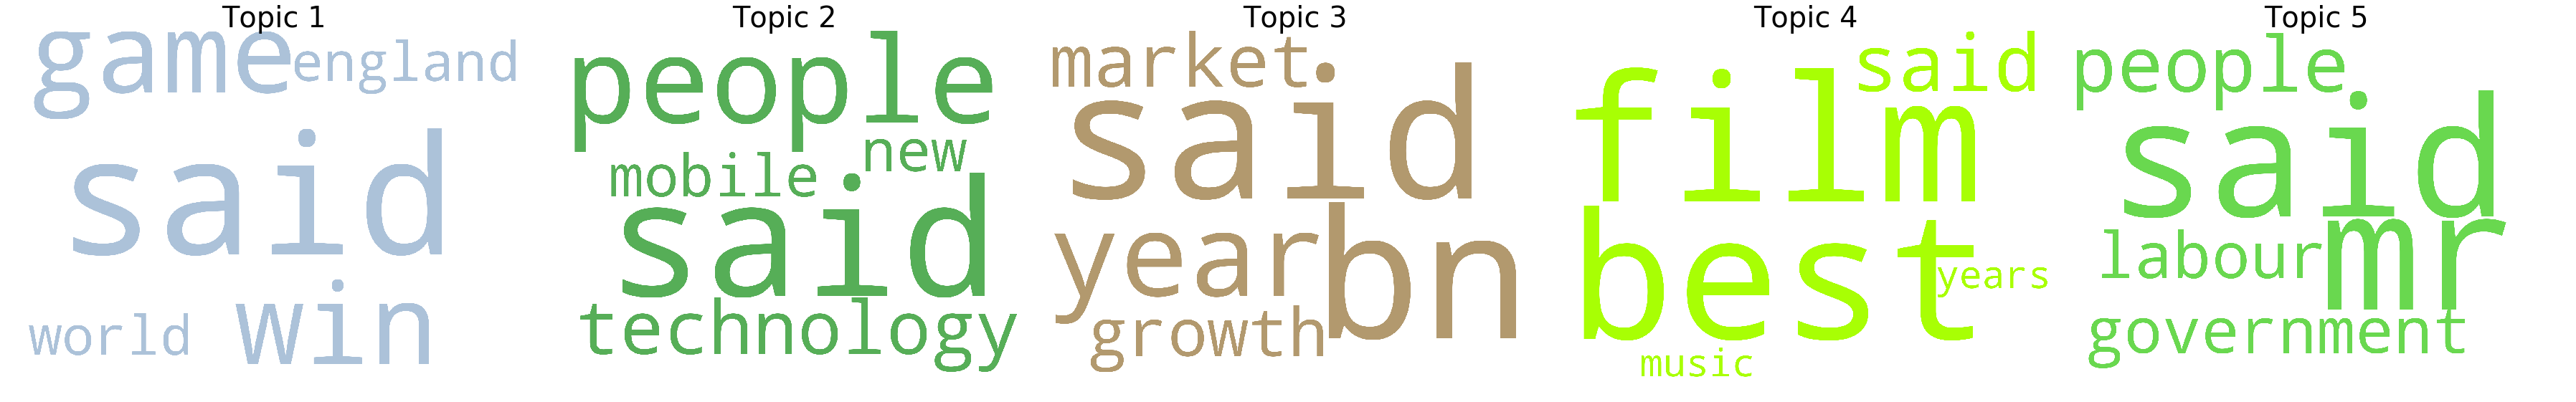

In [15]:
cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # import the colors
from nltk.corpus import stopwords
cloud = WordCloud(#stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(1, 5, figsize=(50,40), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = " ".join(topic_summaries[i].split())
    cloud.generate_from_text(topic_words)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=40))
    plt.gca().axis('off')
   # plt.savefig("./topic/topic"+str(i+1))
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
#plt.savefig("./topic.png")

At this point, we only extract 5 topics from our dataset. However, we want to know the exact the belongness of each article and to get a intuitionistic feeling, in this case, I will use one powerful library called bokeh and the dimension-reduce tool tsne<br>
referring to https://docs.bokeh.org/en/latest/<br>
and http://hackage.haskell.org/package/tsne

In [16]:
import bokeh.plotting as bp 
from bokeh.plotting import save 
from bokeh.models import HoverTool 

In [40]:
# used for reduce dimension and visualization
from sklearn.manifold import TSNE 
tsne_model =TSNE(n_components =2, verbose =1, random_state =0, angle =.99, init ='pca') 
tsne_lda = tsne_model.fit_transform(X_topics) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2225 samples in 0.040s...
[t-SNE] Computed neighbors for 2225 samples in 0.090s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.013437
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.267082
[t-SNE] KL divergence after 1000 iterations: 0.604001


In [41]:
colormap = np.array(["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c"]) 

In [42]:
title = 'Visualization of bbc news'
num_example = len(X_topics) 
plot_lda = bp.figure(plot_width =1400, plot_height =1100, title =title, tools ="pan,wheel_zoom,box_zoom,reset,hover,previewsave", 
x_axis_type =None, y_axis_type =None, min_border =1) 

# create the dictionary with all the information    
plot_dict = {
        'x': tsne_lda[:num_example, 0],
        'y': tsne_lda[:num_example, 1],
        'colors': colormap[lda_keys][:num_example],
        'content': news[:num_example],
        'topic_key': lda_keys[:num_example]
        }

# create the dataframe from the dictionary
plot_df = pd.DataFrame.from_dict(plot_dict)

# declare the source    
source = bp.ColumnDataSource(data=plot_df)
title = 'Visualization of bbc news'

# initialize bokeh plot
plot_lda = bp.figure(plot_width=1400, plot_height=1100,
                     title=title,
                     tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)

# build scatter function from the columns of the dataframe
plot_lda.scatter('x', 'y', color='colors', source=source)

GlyphRenderer(id='1321', ...)

In [43]:
# randomly choose a news (within a topic) coordinate as the crucial words coordinate 
topic_coord = np .empty((X_topics .shape[1], 2)) * np.nan 

for topic_num in lda_keys: 
    if not np.isnan(topic_coord).any(): break 
    topic_coord[topic_num] = tsne_lda[lda_keys.index(topic_num)] 
    
# plot crucial words 
for i in range(X_topics.shape[1]): 
    plot_lda.text(topic_coord[i, 0], topic_coord[i, 1], [topic_summaries[i]]) 
    
# hover tools 
hover = plot_lda.select(dict(type =HoverTool)) 
hover.tooltips = {"content": "@content - topic: @topic_key"} 

# save the plot 
save(plot_lda, '{}.html' .format(title)) 

D:\Anaconda\lib\site-packages\bokeh\io\saving.py:127: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
D:\Anaconda\lib\site-packages\bokeh\io\saving.py:140: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'C:\\Users\\HP\\Desktop\\Visualization of bbc news.html'